## Metis IDS Project - NYC Airbnb Data Analysis

### Exploratory Analysis Ideas:
* View by neighborhood group
* View by neighborhood
* Distribution of variables
* Time since last review ?
* Plot of all variables to see range, std dev,etc
* language diversity variable
* Hosts - which neighborhoods have busy hosts, etc



### Prediction ideas:
* Pice, factors + Ngrams
* Feature importance?
* KMeans on Neighbourhoods

### Cleaning ideas:
* Remove nonsense outliers(i.e. price, min_nights, etc)

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import CSV into RawData df
rawData = pd.read_csv(r'AB_NYC_2019.csv')

### Start Data Exploration

In [3]:
rawData.shape

(48895, 16)

In [4]:
rawData.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
rawData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [40]:
rawData[['price','minimum_nights',
         'number_of_reviews','reviews_per_month',
         'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


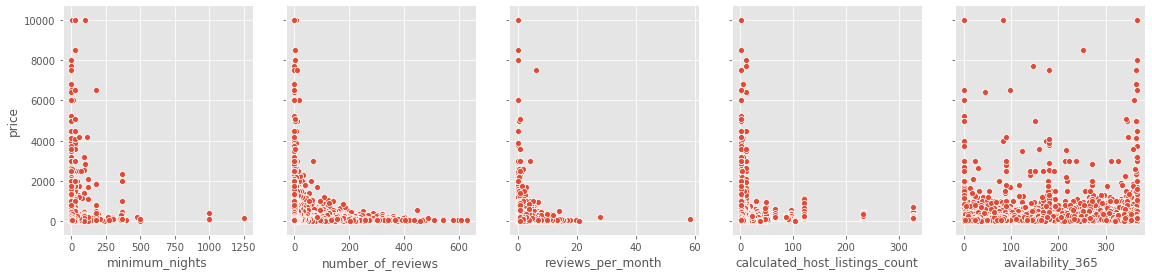

In [41]:
sns.pairplot(rawData,x_vars = ['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'] , y_vars = 'price', height = 4, aspect = .8);

## Inital data cleaning
* fill na values
* create dummy data
* create new vars

In [42]:
# Clean NA Values
# Move to data cleaning section
rawData['reviews_per_month'].fillna(0)

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

## Start Group Analysis

In [43]:
#Create Neighborhood groups DF by Avg Metrics
groupData = rawData.groupby('neighbourhood_group').mean()

In [44]:
groupData.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


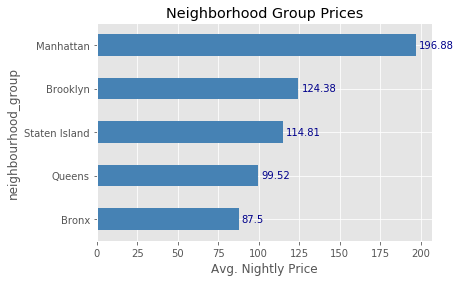

In [45]:
# Data Viz for Avg Prices
   ## Add Variance Bar with yerr
#
groupData['price'].sort_values().plot(kind='barh', title = "Neighborhood Group Prices", color= 'steelblue')
sns.mpl.pyplot.xlabel("Avg. Nightly Price")

#Add data labels after bars
for i,v in enumerate(sorted(groupData.price)):
    sns.mpl.pyplot.text(v+2, i, str(round(v,2)),color='darkblue', va="center")
    
    
 


Text(0, 0.5, 'Frequency')

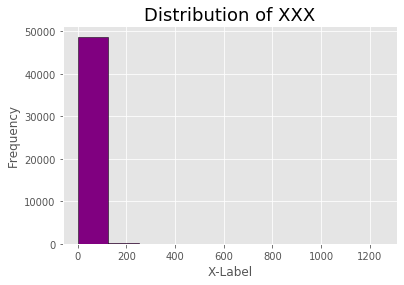

In [46]:
#Histograms
# Sample histogram overlaying data
plt.style.use('ggplot')

# Histogram of the height
rawData['minimum_nights'].plot(kind='hist',color='purple',edgecolor='black')
plt.title('Distribution of XXX', size=18)
plt.xlabel('X-Label', size=12)
plt.ylabel('Frequency', size=12)



In [47]:
#Histogram w/ Overlay Copied Code from Website that will need to convert
df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

NameError: name 'df' is not defined

In [48]:
#Neighbourhood DF
groupDataNeighborhoods = rawData.groupby('neighbourhood').mean()

In [49]:
groupDataNeighborhoods.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.210000e+02,2.210000e+02,221.000000,221.000000,221.000000,221.000000,221.000000,218.000000,221.000000,221.000000
mean,2.130237e+07,9.390507e+07,40.710420,-73.947025,133.248493,5.616269,23.860117,1.666732,3.991190,152.497773
std,4.370584e+06,4.008077e+07,0.099222,0.113718,94.530766,5.440602,14.921102,0.798160,10.001869,62.444847
min,1.798271e+06,1.715301e+06,40.507350,-74.239390,47.333333,1.000000,0.000000,0.220000,1.000000,0.000000
25%,1.856698e+07,6.459455e+07,40.625543,-74.002457,81.730769,2.470588,15.076389,1.121627,1.428571,106.577502
50%,2.130112e+07,9.362863e+07,40.708302,-73.939276,101.800000,4.520000,21.693252,1.535952,1.917949,150.279570
75%,2.412387e+07,1.190618e+08,40.784803,-73.863872,152.714286,6.647059,29.259740,2.006018,2.888889,189.400000
max,3.304754e+07,2.257518e+08,40.907599,-73.726396,800.000000,48.250000,118.500000,5.500000,114.857527,365.000000


In [50]:
groupDataNeighborhoods.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Allerton,2.007729e+07,1.052045e+08,40.865292,-73.858727,87.595238,2.214286,42.928571,1.834054,2.761905,163.666667
Arden Heights,2.935619e+07,1.695545e+08,40.552410,-74.182253,67.250000,9.500000,7.750000,1.040000,1.000000,94.250000
Arrochar,2.077441e+07,8.173055e+07,40.593900,-74.074600,115.000000,2.761905,14.619048,1.114000,4.190476,255.809524
Arverne,2.129500e+07,8.311746e+07,40.591853,-73.794839,171.779221,1.649351,29.259740,1.768030,1.662338,188.428571
Astoria,1.895895e+07,6.845130e+07,40.764299,-73.920002,117.187778,6.036667,21.455556,1.271185,2.772222,109.191111


Text(0.5, 0, 'Avg. Number of Reviews')

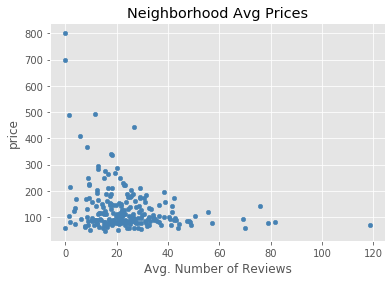

In [51]:
#Plot Neighbourhood DF
## Find how to color neighborhoods
groupDataNeighborhoods[['price','number_of_reviews']].plot( kind='scatter', y='price', x='number_of_reviews', title = "Neighborhood Avg Prices", color= 'steelblue')
sns.mpl.pyplot.xlabel("Avg. Number of Reviews")


In [52]:
# Try histogram
#groupDataNeighborhoods[['price','number_of_reviews']].hist(x='number_of_reviews', y='price', title = "Neighborhood Avg Prices", color= 'steelblue')
#sns.mpl.pyplot.xlabel("Avg. Number of Reviews")


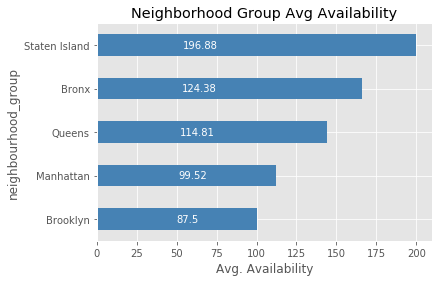

In [53]:
# Data Viz for Avg Availability by NG
groupData['availability_365'].sort_values().plot(kind='barh', title = "Neighborhood Group Avg Availability", color= 'steelblue')
sns.mpl.pyplot.xlabel("Avg. Availability")

#Add data labels within bars
for i,v in enumerate(sorted(groupData.price)):
    sns.mpl.pyplot.text(i+50, i, str(round(v,2)),color='white', va="center")


Text(0.5, 0, 'Avg. Min Nights')

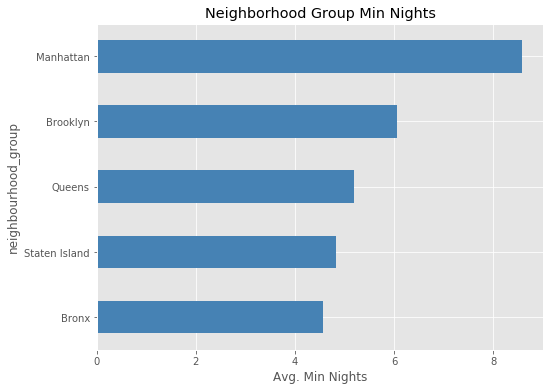

In [54]:
# Data Viz for Avg Prices
groupData['minimum_nights'].sort_values().plot(kind='barh', title = "Neighborhood Group Min Nights", color= 'steelblue', figsize=(8,6) )
sns.mpl.pyplot.xlabel("Avg. Min Nights")

#Add data labels after bars
#for i,v in enumerate(sorted(groupData.price)):
 #   sns.mpl.pyplot.text(v+2, i, str(round(v,2)),color='darkblue', va="center")


### Text Analysis - WIP



In [55]:
#Create DF w/ name column
nameData = rawData[['id','host_id','name']]

In [ ]:
# Create new column for # of chars
nameData["length"] = len(rawData.name)

In [ ]:
nameData.shape

In [ ]:
nameData.head()

In [ ]:
# Sentiment / unique word analysis on name
# Most popular names

#### End Text Analysis

### Start Dummies for Room Type and Neighborhood Group

In [56]:
# Check the different types of rooms
print(rawData.room_type.unique())
print(rawData.neighbourhood_group.unique())

['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [57]:
# Create DF for Room Type Dummies and Neighbourhood Group Dummies
roomTypeDummies = rawData.room_type.str.get_dummies()
NeighbGroupDummies = rawData.neighbourhood_group.str.get_dummies()

# lowercase, replace spaces, replace slashes
roomTypeDummies.columns = roomTypeDummies.columns.str.lower().str.replace(' ','_').str.replace('/','_')
NeighbGroupDummies.columns = NeighbGroupDummies.columns.str.lower().str.replace(' ','_').str.replace('/','_')

#Drop the shared_room dummy column to eliminate unnecessary dummy columns
roomTypeDummies = roomTypeDummies.drop('shared_room',axis=1)
NeighbGroupDummies = NeighbGroupDummies.drop('staten_island',axis=1)

#Join Dummy Dataframes together to create a single Dummies Dataframe
Dummies = roomTypeDummies.merge(NeighbGroupDummies,left_index=True,right_index=True)


#Join Dummies Dataframe with original raw data 
dataWithDummies = rawData.merge(Dummies, left_index=True, right_index=True)

In [58]:
#Drop Original RoomType Categorical columns
#Create list of categorical variables that have been dummied
categorical_vars = ['neighbourhood_group','room_type']


In [59]:
dataWithDumsNoCats = dataWithDummies.drop(categorical_vars,axis=1)

In [60]:
dataWithDumsNoCats

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,entire_home_apt,private_room,bronx,brooklyn,manhattan,queens
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,1,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0,0,1,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,1,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaN,NaN,2,9,0,1,0,1,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,NaN,NaN,2,36,0,1,0,1,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,NaN,NaN,1,27,1,0,0,0,1,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaN,NaN,6,2,0,0,0,0,1,0


In [61]:
print(f'Shape of Raw CSV DF: ',rawData.shape)
print(f'Shape of Transformed DF w/ Room Type and Neigh. Group Dummies: ',dataWithDumsNoCats.shape)

Shape of Raw CSV DF:  (48895, 16)
Shape of Transformed DF w/ Room Type and Neigh. Group Dummies:  (48895, 20)


In [62]:
dataWithDumsNoCats.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
entire_home_apt                     int64
private_room                        int64
bronx                               int64
brooklyn                            int64
manhattan                           int64
queens                              int64
dtype: object

In [63]:
# strip out unnecessary columns

In [64]:


transformCorrs = dataWithDumsNoCats.corr()
transformCorrs

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,entire_home_apt,private_room,bronx,brooklyn,manhattan,queens
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468,-0.054831,0.037707,0.051138,-0.057846,-0.019667,0.090249
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492,-0.077591,0.056616,0.073008,-0.115918,0.002389,0.131425
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983,-0.005712,0.004363,0.330669,-0.672932,0.590639,0.017145
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731,-0.192143,0.183613,0.221315,0.017735,-0.433531,0.622749
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829,0.255857,-0.240246,-0.041030,-0.098603,0.163976,-0.080205
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303,0.074900,-0.073837,-0.018186,-0.039658,0.067362,-0.032629
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028,-0.010087,0.017253,0.009258,0.017414,-0.045820,0.035967
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,-0.041564,0.039125,0.041997,-0.045902,-0.052057,0.123484
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701,0.112193,-0.108945,-0.022511,-0.123234,0.152842,-0.033881
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000,-0.006804,-0.010986,0.060806,-0.079671,-0.005434,0.087113


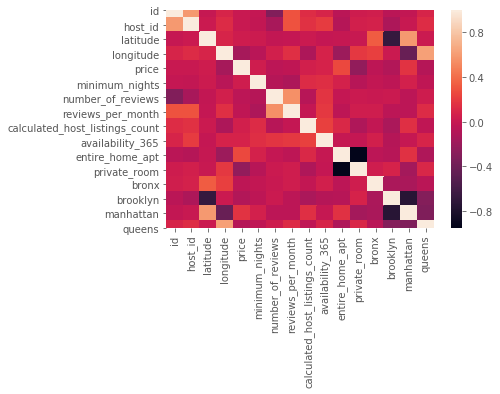

In [65]:
sns.heatmap(transformCorrs)

In [66]:
# Remove Unnecessary columns


# Start Lin Regression

In [67]:
# Get dummy column names in list
dummy_cols = list(Dummies.columns)
dummy_cols

['entire_home_apt', 'private_room', 'bronx', 'brooklyn', 'manhattan', 'queens']

In [68]:
# Start w/ copy and edit
mult_feature_cols = ['number_of_reviews','minimum_nights','calculated_host_listings_count',
                    'availability_365'] + dummy_cols
X_mult = dataWithDumsNoCats[mult_feature_cols]
y_mult = dataWithDumsNoCats.price

# instantiate and fit like last time
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_
# print the coefficients like last time
print(intercept)
print(coeffs)

# pair the feature names with the coefficients
list(zip(mult_feature_cols, multiple_linreg.coef_))

2.1692777663831464
[-3.15301998e-01 -1.56069248e-02 -1.10434662e-01  1.87932895e-01
  1.44892931e+02  3.34043170e+01 -7.60388969e+00  2.56265727e+01
  8.12262168e+01  5.98482346e+00]


[('number_of_reviews', -0.31530199774541406),
 ('minimum_nights', -0.015606924825827694),
 ('calculated_host_listings_count', -0.11043466243688638),
 ('availability_365', 0.18793289467818775),
 ('entire_home_apt', 144.8929308377262),
 ('private_room', 33.40431695527485),
 ('bronx', -7.603889687829421),
 ('brooklyn', 25.626572688713523),
 ('manhattan', 81.22621682595468),
 ('queens', 5.984823457688519)]

In [ ]:
# R2 and error analysis of initial model

In [ ]:

# Scatter plot of Height and Weight

ax1= df[df['Gender']=='Male'].plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(10,7))
df[df['Gender']=='Female'].plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);